In [1]:
import torch
import torchvision.transforms as transforms
import timm.data.transforms as timm_transforms

from PIL import Image
import requests
from io import BytesIO


/media/toma/2TB_30May2023/OBJECT_DETECTION_L/object_detection/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


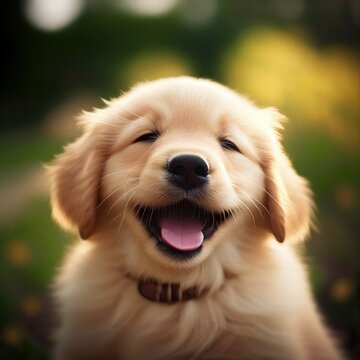

In [2]:
IMG_URL = "https://t4.ftcdn.net/jpg/05/68/28/05/360_F_568280532_Bvxwd66M3Y22vVeJ3VRqHRAqrdNfJo7o.jpg"

response = requests.get(IMG_URL)
image = Image.open(BytesIO(response.content))
image

In [3]:
### FROM FOCALNET PAPER, IMAGENET AUGMENTAION:

    # | Color Jitter Factor           | 0.4      | 
    # | Auto-augmentation             | rand-m9-mstd0.5-inc1 | 
    # | Random Erasing Probability    | 0.25     | 
    # | Random Erasing Mode           | Pixel    | 
    # | Mixup α                       | 0.8      |
    # | Cutmix α                      | 0.8      |
    # | Mixup Probability             | 1.0      |
    # | Mixup Switch Probability      | 0.5      |
    # | Stochastic Drop Path Rate     | 0.2/0.3/0.5 |
    # | Label Smoothing               | 0.1      |


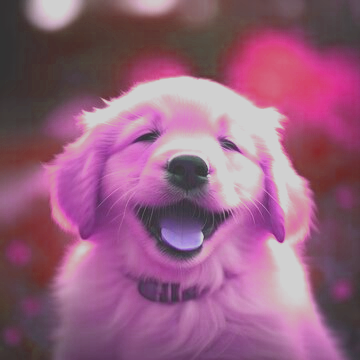

In [24]:
 # | Color Jitter Factor           | 0.4      | 

color_jitter = transforms.ColorJitter(brightness=0.4, contrast=0.4,
                                          saturation=0.4, hue=0.4)

img_aug = color_jitter(image)
img_aug

In [27]:
# | Auto-augmentation             | rand-m9-mstd0.5-inc1 | 

import random

class AutoAugment:

    def __init__(self, policy):
        self.policy = policy

    def __call__(self, img):
        sub_policy = random.choice(self.policy)
        for op in sub_policy:
            img = op(img)
        return img
    
auto_augment = timm_transforms.AutoAugment(policy='rand-m9-mstd0.5-inc1')

img_aug = auto_augment(image)
img_aug

TypeError: 'str' object is not callable

In [ ]:
import torch
import torchvision.transforms as transforms
import timm.data.transforms as timm_transforms

def get_augmentation_transforms(color_jitter_factor, random_erasing_prob, mixup_alpha, cutmix_alpha, label_smoothing):
    # Color Jitter
    color_jitter = transforms.ColorJitter(brightness=color_jitter_factor, contrast=color_jitter_factor,
                                          saturation=color_jitter_factor, hue=0.0)

    # Auto-augmentation
    auto_augment = timm_transforms.AutoAugment(policy='rand-m9-mstd0.5-inc1')

    # Random Erasing
    random_erasing = timm_transforms.RandomErasing(probability=random_erasing_prob, mode='pixel')

    # Mixup
    mixup = timm_transforms.Mixup(alpha=mixup_alpha, prob=1.0, switch_prob=0.5)

    # Cutmix
    cutmix = timm_transforms.CutMix(alpha=cutmix_alpha, prob=1.0)

    # Label Smoothing
    label_smoothing = transforms.Lambda(lambda target: target.float().mul(1.0 - label_smoothing) +
                                                    torch.ones_like(target).float().mul(label_smoothing))

    return transforms.Compose([
        color_jitter,
        auto_augment,
        random_erasing,
        mixup,
        cutmix,
        label_smoothing
    ])


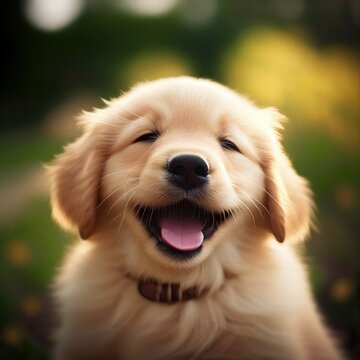

In [15]:
IMG_URL = "https://t4.ftcdn.net/jpg/05/68/28/05/360_F_568280532_Bvxwd66M3Y22vVeJ3VRqHRAqrdNfJo7o.jpg"

response = requests.get(IMG_URL)
image = Image.open(BytesIO(response.content))
image
# augmented_image = transforms(image)

In [43]:
auto_augment = timm_transforms.AutoAugment(policy='rand-m9-mstd0.5-inc1')

img = auto_augment(image)
img

AttributeError: module 'timm.data.transforms' has no attribute 'AutoAugment'

In [ ]:


import torchvision.transforms as transforms

    # | Color Jitter Factor           | 0.4      | d
    # | Auto-augmentation             | rand-m9-mstd0.5-inc1 | 
    # | Random Erasing Probability    | 0.25     | 
    # | Random Erasing Mode           | Pixel    | 
    # | Mixup α                       | 0.8      |
    # | Cutmix α                      | 0.8      |
    # | Mixup Probability             | 1.0      |
    # | Mixup Switch Probability      | 0.5      |
    # | Stochastic Drop Path Rate     | 0.2/0.3/0.5 |
    # | Label Smoothing               | 0.1      |


color_jitter_factor = 0.4
color_jitter_transform = transforms.ColorJitter(brightness=color_jitter_factor, contrast=color_jitter_factor,
                                                saturation=color_jitter_factor, hue=color_jitter_factor)


# # Auto-augmentation
# auto_augmentation_transform = transforms.AutoAugment(policy=transforms.AutoAugmentPolicy.IMAGENET)

# # Random Erasing
# random_erasing_probability = 0.25
# random_erasing_transform = transforms.RandomErasing(p=random_erasing_probability, value='random', inplace=False)



# # Mixup
# mixup_alpha = 0.8
# mixup_probability = 1.0
# mixup_switch_probability = 0.5
# mixup_transform = transforms.RandomMixup(probability=mixup_probability, switch_prob=mixup_switch_probability,
#                                          alpha=mixup_alpha)

# # Cutmix
# cutmix_alpha = 0.8
# cutmix_transform = transforms.RandomCutmix(probability=1.0, beta=cutmix_alpha)

# # Compose all transforms
# composed_transforms = transforms.Compose([
#     color_jitter_transform,
#     auto_augmentation_transform,
#     random_erasing_transform,
#     mixup_transform,
#     cutmix_transform,
#     transforms.ToTensor(),
# ])

# # Apply transforms to your dataset or image
# transformed_data = composed_transforms(your_data)




